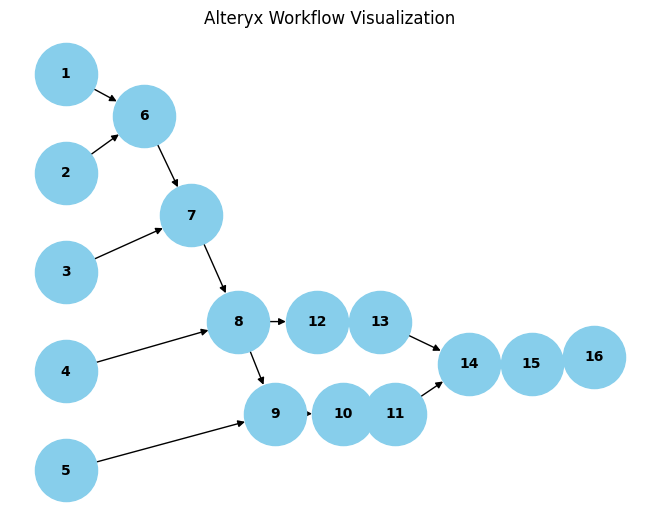

In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx

def visualize_yxmd(file_path):
    # Parse the XML from the .yxmd file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract tool positions
    positions = {}
    for node in root.find('Nodes'):
        tool_id = node.attrib['ToolID']
        position = node.find('GuiSettings').find('Position')
        x = int(position.attrib['x'])
        y = int(position.attrib['y'])
        positions[tool_id] = (x, -y)  # Flip y for better visual orientation
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with positions
    for tool_id, pos in positions.items():
        G.add_node(tool_id, pos=pos)

    # Add edges based on connections
    for conn in root.find('Connections'):
        origin = conn.find('Origin').attrib['ToolID']
        destination = conn.find('Destination').attrib['ToolID']
        G.add_edge(origin, destination)

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue',
            font_size=10, font_weight='bold', arrows=True)
    plt.title("Alteryx Workflow Visualization")
    plt.show()

# Example usage:
# visualize_yxmd("path_to_your_file.yxmd")

# if __name__ == "__main__":
visualize_yxmd("C:\\Users\\10839330\\OneDrive - LTIMindtree\\Desktop\\Ollama_Agents\\7_yxmd_to_img\\sending_pattern_workflow6.yxmd")


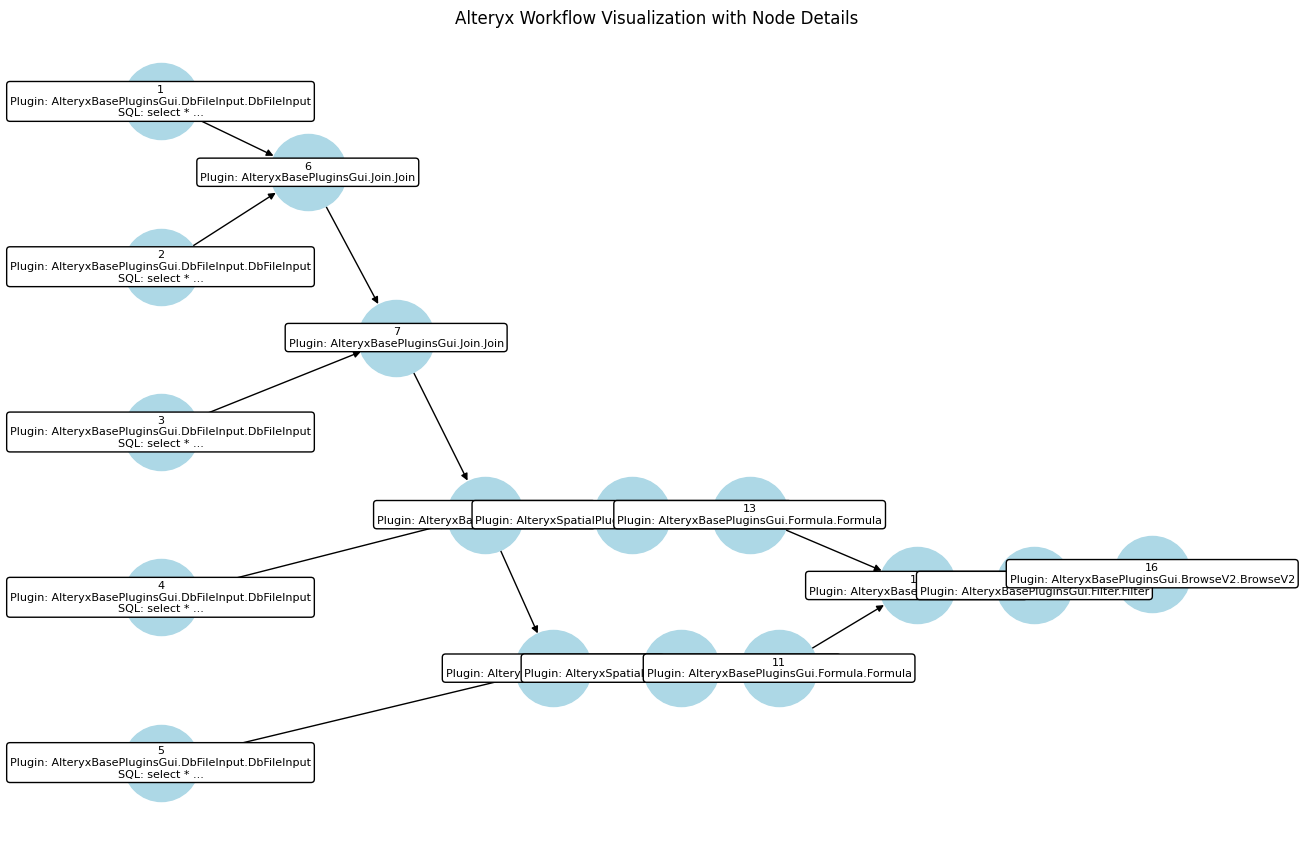

In [3]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx

def extract_node_info(node):
    tool_id = node.attrib.get('ToolID', 'Unknown')
    plugin = node.find('GuiSettings').attrib.get('Plugin', 'Unknown')
    config = node.find('Properties').find('Configuration')
    
    # Extract summary information
    summary = f"Plugin: {plugin}"
    
    # Try to extract SQL query if present
    query = config.find('.//Query')
    if query is not None and query.text:
        summary += f"\nSQL: {query.text.strip().splitlines()[0][:40]}..."  # First line of SQL
    
    # Try to extract join type if present
    join_type = config.find('.//JoinType')
    if join_type is not None and join_type.text:
        summary += f"\nJoinType: {join_type.text.strip()}"
    
    return tool_id, summary

def visualize_yxmd(file_path):
    # Parse the XML from the .yxmd file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract tool positions and info
    positions = {}
    labels = {}
    for node in root.find('Nodes'):
        tool_id, summary = extract_node_info(node)
        position = node.find('GuiSettings').find('Position')
        x = int(position.attrib['x'])
        y = int(position.attrib['y'])
        positions[tool_id] = (x, -y)
        labels[tool_id] = f"{tool_id}\n{summary}"

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with positions
    for tool_id, pos in positions.items():
        G.add_node(tool_id, pos=pos)

    # Add edges based on connections
    for conn in root.find('Connections'):
        origin = conn.find('Origin').attrib['ToolID']
        destination = conn.find('Destination').attrib['ToolID']
        G.add_edge(origin, destination)

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', arrows=True)
    for tool_id, (x, y) in pos.items():
        plt.text(x, y, labels[tool_id], fontsize=8, ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    plt.title("Alteryx Workflow Visualization with Node Details")
    plt.axis('off')
    plt.show()

# Example usage:
visualize_yxmd("C:\\Users\\10839330\\OneDrive - LTIMindtree\\Desktop\\Ollama_Agents\\7_yxmd_to_img\\sending_pattern_workflow6.yxmd")


C:\Users\10839330\AppData\Local\Temp\ipykernel_13816\2609251761.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


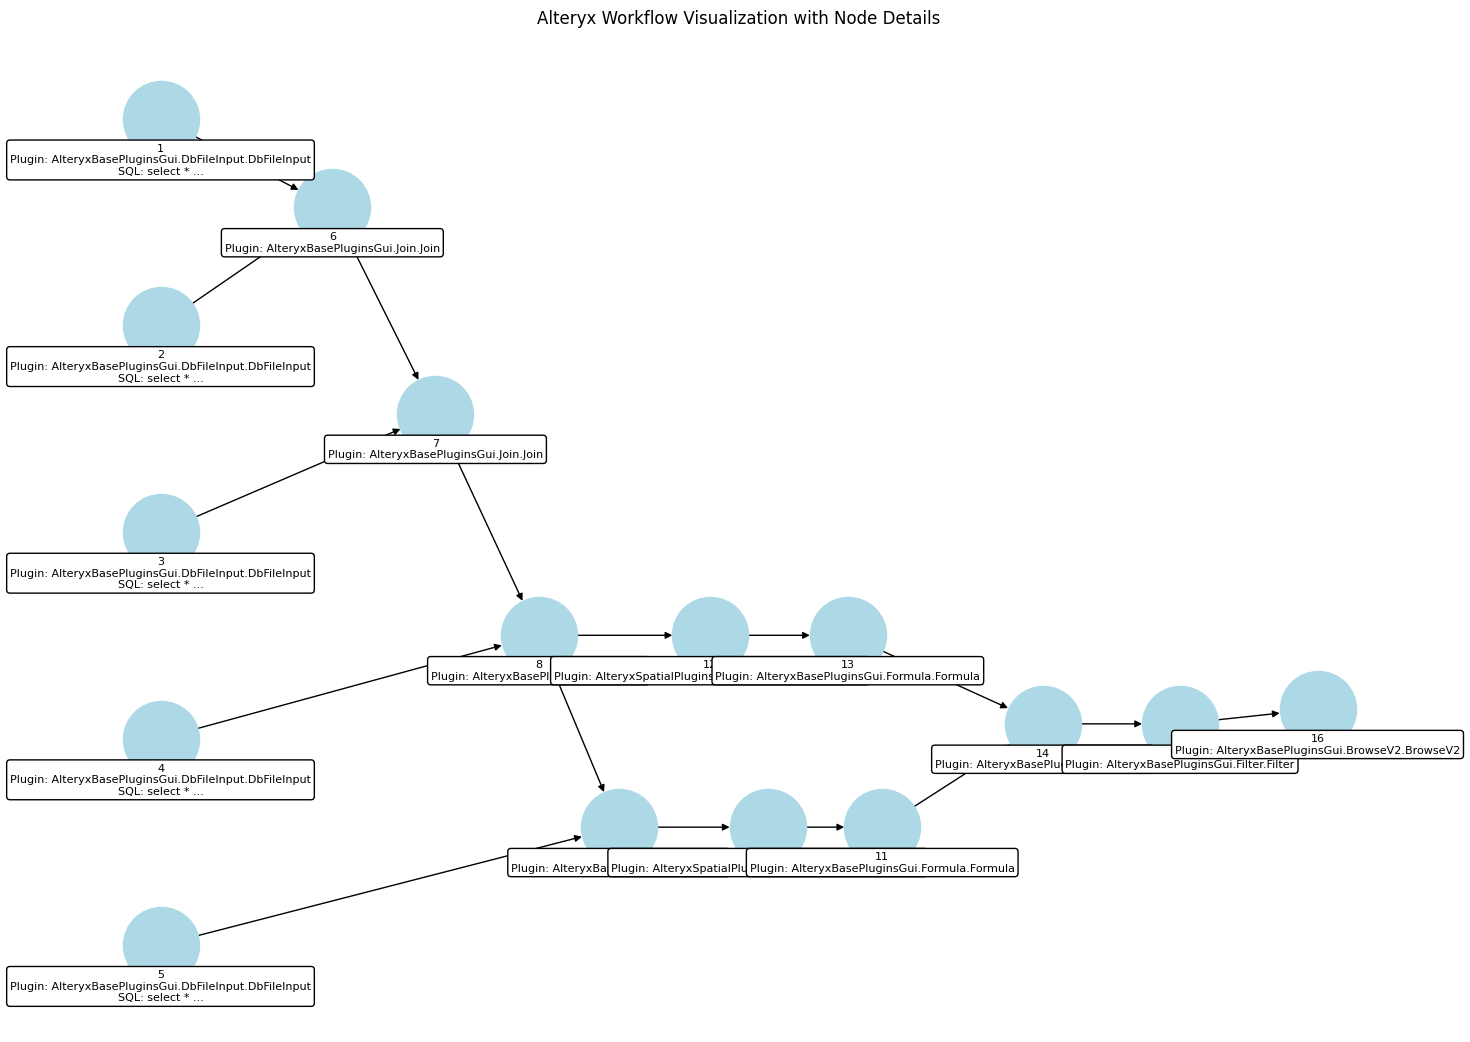

In [4]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx

def extract_node_info(node):
    tool_id = node.attrib.get('ToolID', 'Unknown')
    plugin = node.find('GuiSettings').attrib.get('Plugin', 'Unknown')
    config = node.find('Properties').find('Configuration')

    # Extract summary information
    summary = f"Plugin: {plugin}"

    # Try to extract SQL query if present
    query = config.find('.//Query')
    if query is not None and query.text:
        summary += f"\nSQL: {query.text.strip().splitlines()[0][:60]}..."  # First line of SQL

    # Try to extract join type if present
    join_type = config.find('.//JoinType')
    if join_type is not None and join_type.text:
        join_type_text = join_type.text.strip().lower()
        if "inner" in join_type_text:
            summary += "\nJoin Type: Inner Join"
        elif "outer" in join_type_text:
            summary += "\nJoin Type: Outer Join"
        elif "left" in join_type_text:
            summary += "\nJoin Type: Left Join"
        elif "right" in join_type_text:
            summary += "\nJoin Type: Right Join"
        else:
            summary += f"\nJoin Type: {join_type.text.strip()}"

    return tool_id, summary

def visualize_yxmd(file_path):
    # Parse the XML from the .yxmd file
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Extract tool positions and info
    positions = {}
    labels = {}
    for node in root.find('Nodes'):
        tool_id, summary = extract_node_info(node)
        position = node.find('GuiSettings').find('Position')
        x = int(position.attrib['x'])
        y = int(position.attrib['y'])
        positions[tool_id] = (x, -y)
        labels[tool_id] = f"{tool_id}\n{summary}"

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with positions
    for tool_id, pos in positions.items():
        G.add_node(tool_id, pos=pos)

    # Add edges based on connections
    for conn in root.find('Connections'):
        origin = conn.find('Origin').attrib['ToolID']
        destination = conn.find('Destination').attrib['ToolID']
        G.add_edge(origin, destination)

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(14, 10))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', arrows=True)

    # Offset labels to avoid overlap
    for tool_id, (x, y) in pos.items():
        plt.text(x, y - 20, labels[tool_id], fontsize=8, ha='center', va='top',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.title("Alteryx Workflow Visualization with Node Details")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_yxmd("path_to_your_file.yxmd")

visualize_yxmd("C:\\Users\\10839330\\OneDrive - LTIMindtree\\Desktop\\Ollama_Agents\\7_yxmd_to_img\\sending_pattern_workflow6.yxmd")


C:\Users\10839330\AppData\Local\Temp\ipykernel_13816\3078322858.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


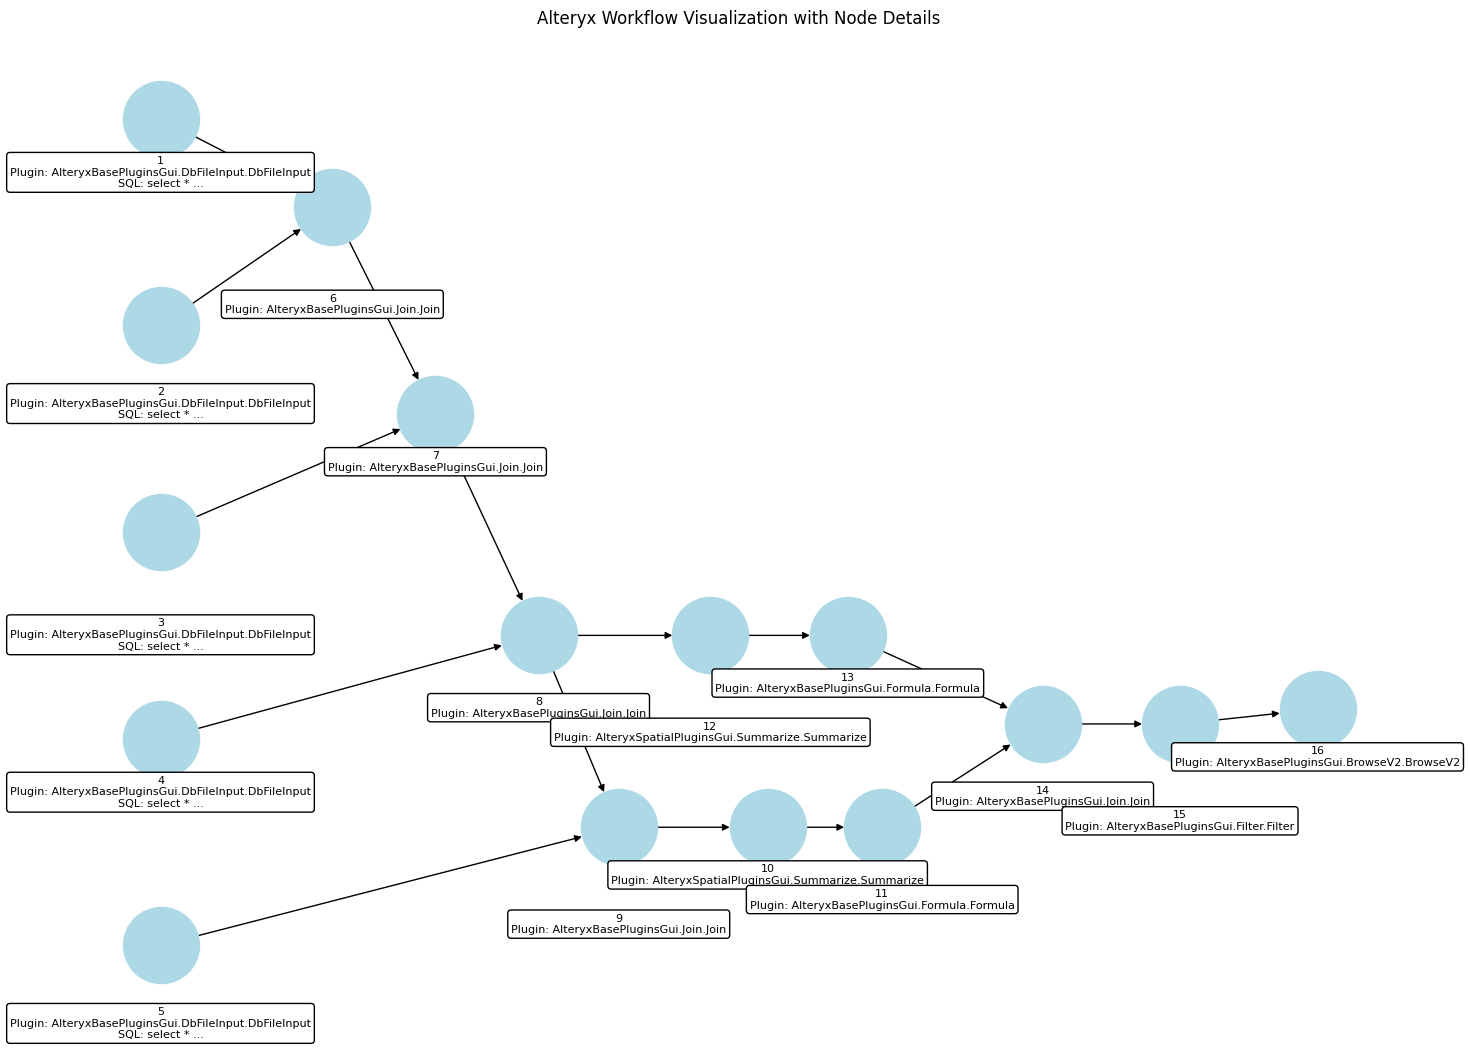

In [5]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import networkx as nx

def extract_node_info(node):
    tool_id = node.attrib.get('ToolID', 'Unknown')
    plugin = node.find('GuiSettings').attrib.get('Plugin', 'Unknown')
    config = node.find('Properties').find('Configuration')

    summary = f"Plugin: {plugin}"

    # Extract SQL query preview
    query = config.find('.//Query')
    if query is not None and query.text:
        summary += f"\nSQL: {query.text.strip().splitlines()[0][:60]}..."

    # Extract join type
    join_type = config.find('.//JoinType')
    if join_type is not None and join_type.text:
        jt = join_type.text.strip().lower()
        if "inner" in jt:
            summary += "\nJoin Type: Inner Join"
        elif "outer" in jt:
            summary += "\nJoin Type: Outer Join"
        elif "left" in jt:
            summary += "\nJoin Type: Left Join"
        elif "right" in jt:
            summary += "\nJoin Type: Right Join"
        else:
            summary += f"\nJoin Type: {join_type.text.strip()}"

    return tool_id, summary

def visualize_yxmd(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    positions = {}
    labels = {}
    for node in root.find('Nodes'):
        tool_id, summary = extract_node_info(node)
        position = node.find('GuiSettings').find('Position')
        x = int(position.attrib['x'])
        y = int(position.attrib['y'])
        positions[tool_id] = (x, -y)
        labels[tool_id] = f"{tool_id}\n{summary}"

    G = nx.DiGraph()
    for tool_id, pos in positions.items():
        G.add_node(tool_id, pos=pos)

    for conn in root.find('Connections'):
        origin = conn.find('Origin').attrib['ToolID']
        destination = conn.find('Destination').attrib['ToolID']
        G.add_edge(origin, destination)

    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(14, 10))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', arrows=True)

    # Offset labels to avoid overlap
    for i, (tool_id, (x, y)) in enumerate(pos.items()):
        offset = 30 + (i % 3) * 20  # staggered vertical offset
        plt.text(x, y - offset, labels[tool_id], fontsize=8, ha='center', va='top',
                 bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    plt.title("Alteryx Workflow Visualization with Node Details")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
# visualize_yxmd("path_to_your_file.yxmd")
visualize_yxmd("C:\\Users\\10839330\\OneDrive - LTIMindtree\\Desktop\\Ollama_Agents\\7_yxmd_to_img\\sending_pattern_workflow6.yxmd")